# Proyecto

## 1. Auditoría de datos

Preparación, auditoria y análisis de variables: Descripción estadística de los datos, número de clases, distribución de las clases, otras estadísticas y análisis.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
import sklearn as skl
import seaborn as sns
import math
import sklearn.preprocessing as preprocessing
import statsmodels as sm
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
from pandas.tools.plotting import scatter_matrix

#### Carga de datos
Se realiza la carga de los datos con los que se va a trabajar en el proyecto, que son los datos del dataset de "Bike-Sharing-Dataset".
Este dataset tiene como objetivo el predecir el uso diario y horario de un sistema de alquiler de bicicletas basándose en datos climatológicos, día de la semana, temporada, etc. El dataset incluye dos años de uso de bicicletas del sistema público de Washington DC.

In [3]:
# carga de datos del fichero diario
df_bike_day = pd.read_csv('day.csv', sep=',')

print("num_rows: %d\tColumnas: %d\n" % (df_bike_day.shape[0], df_bike_day.shape[1]) )
print("Columnas:\n", list(df_bike_day.columns))

num_rows: 731	Columnas: 16

Columnas:
 ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [4]:
# carga de datos del fichero de hora
df_bike_hour = pd.read_csv('hour.csv', sep=',')

print("num_rows: %d\tColumnas: %d\n" % (df_bike_hour.shape[0], df_bike_hour.shape[1]) )
print("Columnas:\n", list(df_bike_hour.columns))

num_rows: 17379	Columnas: 17

Columnas:
 ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


Ambos datasets tienen las mismas columnas, excepto la columna "hr" que sólo tiene el dataset con los datos por hora en lugar de diarios.


    - instant: record index
	- dteday: date
	- season: season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr: year (0: 2011, 1:2012)
	- mnth: month ( 1 to 12)
	- hr: hour (0 to 23)
	- holiday: weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday: day of the week
	- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit: 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp: Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [5]:
# primer vistazo a los datos diarios
df_bike_day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [6]:
# primer vistazo a los datos por hora
df_bike_hour.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


A partir de este punto nos quedamos con el dataset con los datos horarios, que tienen las mismas variables que el otro dataset más el dato de la hora, además que tiene bastantes más registros para analizar.

#### 1. Descripción de las variables y valores estadísticos (mínimo, máximo, media, desviación, mediana, etc.). Estudia qué valores estadísticos son los convenientes según el tipo de variable y procede en consecuencia.


In [6]:
# creamos un dataframe horario sin la columna instant que funciona como índice y no tiene información 
# relevante para el análisis
df_bike_hours = df_bike_hour.iloc[:,1:]

# usamos describe para ver los primeros datos estadísticos sobre cada atributo del dataset
df_bike_hours.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000


###### Comentarios

Usamos la función Describe para llevar a cabo un análisis de los valores de cada atributo, obteniendo información sobre la distribución de los datos.

Sabemos que, cuando la media prácticamente coincide con la mitad del valor mínimo y el máximo, si además el percentil 50% también es prácticamente similar a la media, indica que la dispersión de los datos es pequeña y la mitad de los datos están en la parte izquierda del conjunto y la otra mitad en la parte derecha.

Siguiendo esto, podmos concluir que la variable "cnt", que será la variable elegida como target, no está uniformemente distribuida en el rango de valores que toma, ya que hay más valores en la parte baja del rango que hace que su media y percentil 50% sean más bajos de lo que podría ser. Además el valor máximo que toma está muy alejado de estos valores, lo que sugiere que puede haber valores que podríamos considerar como outliers.

Con este primer análisis introductorio no podemos inferir mucha útil  información de las variables categóricas atraves  de la información que conseguimos con la función Describe, pero por ejemplo si se puede apreciar en la variable "weathersit", que indica el tipo de día en base al tiempo que realizaba ese día, que a lo largo del año la mayor parte de días fueron de tipo 1, que indica que son días con buen tiempo, ya que la mediana que deja por debajo al 50% de los datos del conjunto es 1.

Por otro lado, de las variables numéricas si se pueden sacar más conclusiones, gracias a la información obtenido con la función Describe. Por ejemplo podemos observar como las variables "temp" y "atemp" que representan la temperatura y temperatura ambiental, parecen estar muy relacionadas entre sí y ya nos puede indicar una correlación antes de estudiarlo en otro apartado.

Para finalizar también podemos ver como la variable "cnt" tiene un valor mínimo de 1, lo que indicaría que todos los días del año al menos se hizo una utilización del servicio.

###### Histogramas y número de clases

Número de clases:
La variable que pensamos que nos va a aportar más información como clase para separar los datos y estudiarlos en base a cada una, es la variable "year" que indica los datos del año 1 a estudiar, y los datos del año 2.
Así pueden enfrentarse los datos y comparar la evolución de un año a otro, lo que podemos utilizar a la hora de hacer un estudio del negocio y la posterior mejora del servicio año tras año.

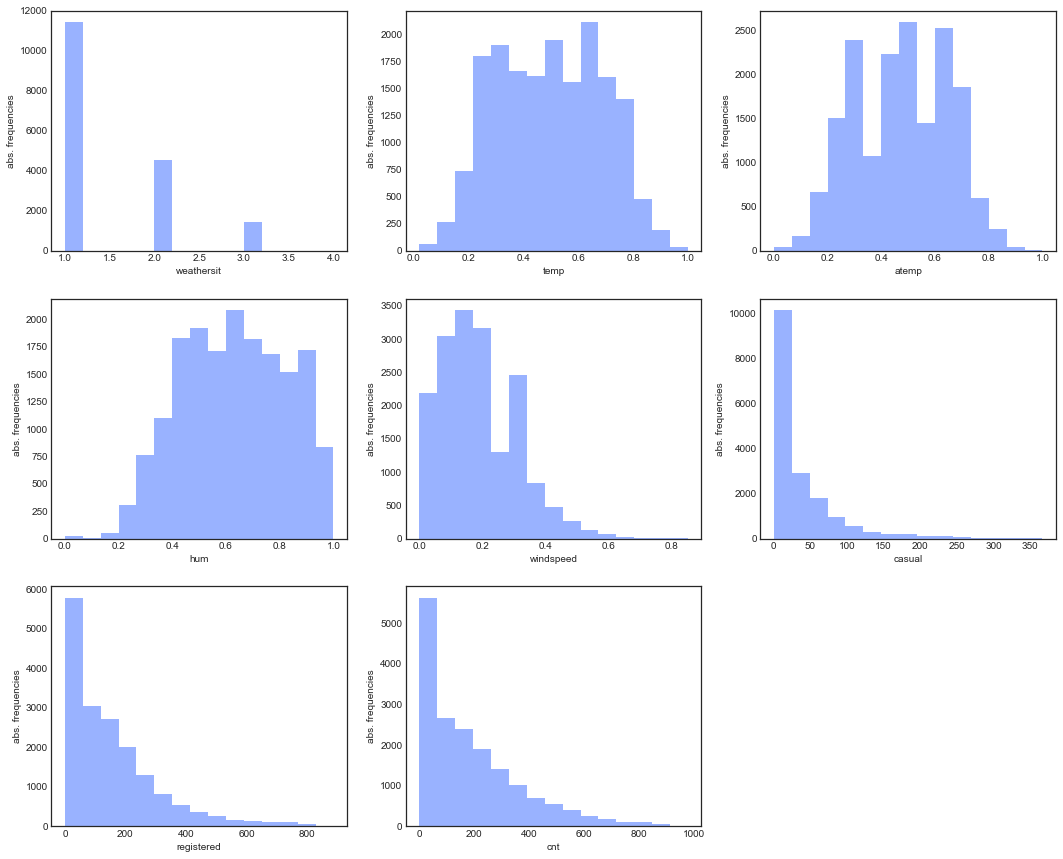

In [7]:
# Histogramas para el dataset horario.
sns.set_color_codes("bright")
sns.set_style("white")

# se crea otro df para visualizar los histogramas y hacerlo sobre las variables que tenga sentido
df_aux_histograma = df_bike_hours.drop(labels=["dteday", "season", "yr", "mnth", "hr",\
                                               "holiday", "weekday", "workingday"], axis=1)

num_columns = 3
num_rows = int(np.ceil(len(df_aux_histograma.columns)/num_columns))

plt.figure(figsize=(18, 5*num_rows))

for i, var in enumerate (df_aux_histograma.columns):
    plt.subplot(num_rows, num_columns, i+1)
    sns.distplot( df_aux_histograma[var].iloc[:], bins=15, kde=False, color='b')
    plt.ylabel("abs. frequencies")
    plt.xlabel(var)
    
plt.show()

###### Comentarios sobre los histogramas.

A través de los histogramas podemos apreciar la distribución de un conjunto de datos. Podemos analizar los picos, la simetría y asimetría del conjunto, o incluso datos atípicos u outliers.

Hemos pintado los histogramas de las variables numéricas, y ahora podemos analizar mejor la distribución de sus datos respecto a lo visto con el primer análisis con Describe, incluso en alguno de los gráficos ya podemos ver la presencia de valores outliers, aunque estos valores los podremos analizar mejor posteriormente mediante los boxplots.

De nuevo vemos como las variables de "temp" y "atemp" parecen estar relacionadas, ya que sus histogramas siguen un mismo patrón o distribución de datos.

En la variable "hum", que indica la humedad, vemos algún valor que podría ser un valor atípico, y que corresponde cuando la humedad es prácticamente nula, lo que indicaría días totalmente secos en el ambiente, lo que según el histograma no sería algo habitual.

La variable que indica la velocidad del viento, "windspeed", tiene una distribución donde lo habitual son días con poco viento, y a medida que el viento crece decrece la frecuencia.

El histograma de la variable "weathersit" nos indica lo mismo que vimos con Describe. Los días más habituales a lo largo del año son aquellos claros y con buen tiempo, y decrece la frecuencia a medida que aumenta el grado de mal tiempo.

Los histogramas de las variables que recogen el recuento de usos diarios, siguen una distribución donde los picos y la mayor concentración de datos están en los valores pequeños, por tanto los días con mayor registro de usos son los menos habitaules, al contrario que los días donde hubo un uso limitado del servicio.

Lo que nos interesa ahora, es analizar las distintas variables en relación al recuento final, para poder estudiar: en que época del año hay mayor uso, en que día de la semana, en que hora del día, bajo que condiciones climatológicas y de esta forma tratar de inferir cuando son los tramos de más uso de bicicletas en la zona de Washington DC.

Text(0.5,1,'Media del recuento por mes')

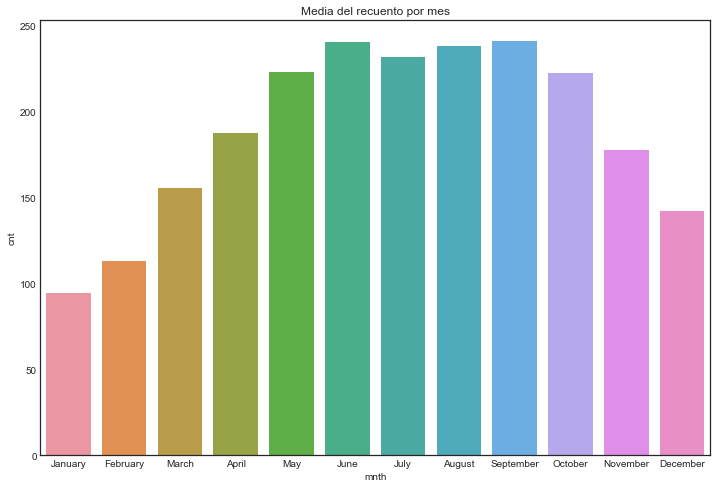

In [8]:
# En priemr lugar mostramos la Media del recuento por mes:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
month_count=pd.DataFrame(df_bike_hours.groupby("mnth")["cnt"].mean()).reset_index()
plt.figure(figsize=(12, 8))
_ = sns.barplot(data=month_count,x="mnth",y="cnt",label=months)
plt.xticks(np.arange(0,12),months)
plt.title("Media del recuento por mes")

Text(0.5,1,'Horas con mayor uso del servicio')

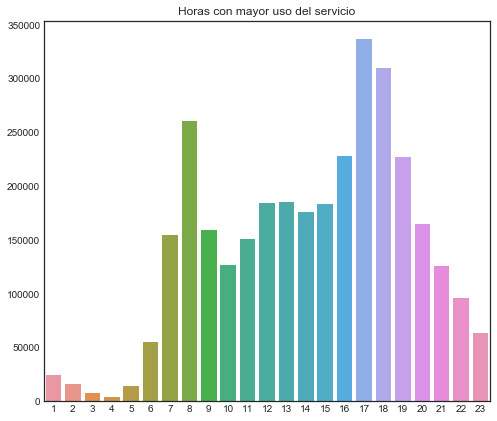

In [9]:
# Recuento total por hora del día
hours=[]
for i in range(1,24):
    d=np.sum(df_bike_hours[df_bike_hours['hr']==i]['cnt'].values.tolist())
    hours.append(d)
plt.figure(figsize=(8, 7))
_ = sns.barplot(np.arange(1,24),hours)
plt.title("Horas con mayor uso del servicio")

###### Comentarios
Analizando el uso mensual y diario del servicio, podemos observar como en el histograma de "Uso de servicio por meses" son los meses de Verano donde más se utiliza el servicio de renting, algo que puede tener lógica debido a que son los meses donde suele hacer mejor tiempo.

En el caso del Histograma de "Uso del servicio por horas", la acumulación de uso la apreciamos a primera hora, entre  las 7 y las 9, que es el horario de entra de trabajo  y a la tarde sobre las 17 y 18 lo que podría corresponder a la salida de trabajo de los usuarios.

#### 2. Describe y realiza modificaciones en la base datos si lo consideras necesario. Por ejemplo, qué harías con valores nominales, si los hubiera.

Revisando el dataset vemos que las variables "season", "yr", "mnth" o "weathersit" son variables categóricas. Estas variables deberían tener valores nominales, pero ya vienen transformadas a valores númericos, donde cada valor está asociado a cada una de las categorías definidas para cada variable.

Por ejemplo, para la variable season los valores 1,2,3 y 4 han sustituido a los valores nominales springer, summer, fall, winter. (1:springer, 2:summer, 3:fall, 4:winter)

En caso de encontraros valores nominales en el dataset, realizaríamos el mimos proceso de transformación de asignarles un rango de valores numéricos asociados a sus correspondientes valores categóricos.

Hemos visto que en la definición de las variables del dataset se indica que los valores de la variable "season" son 1's, y nos hemos dado cuenta en un primer análisis exploratorio que el valor de esta variable no está correctamente relacionado con la fecha del mismo registro, por lo que estos valores están mal. Para solucionar esto podríamos optar o por eliminar dicha variable ya que aportaría información incorrecta o actualizarla con el valor de la season extraido de la fecha de cada uno de los registros, con la siguiente asiganción en el orden correcto: (1:winter, 2:springer, 3:summer, 4:fall).

Ejemplo de modificación de los valores del atributo season, si quisieramos cambiar los valores y adecuarlos a lo que dice la definición del atributo en la documentación del dataset:
df_bike_hours.replace({'season': {1: '4', 2: '1', 3: '3', 4: '2'}},  inplace = True)

Text(0.5,1,'Media del recuento por estación')

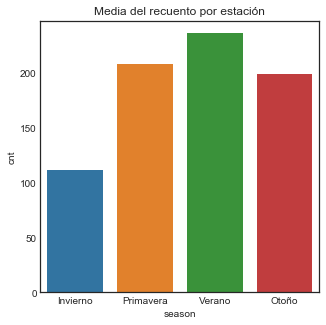

In [12]:
# Una vez modificada correctamente la variable season, o simplemente teniendo en cuenta que el valor que viene no coincide
# con el que dice la definición del dataset, se pueden realizar análisis en base a ella, pues nos parece interesante
# estudiar por temporadas el uso del servicio de renting de bicicletas.

# Media por estación del año
estaciones = ["Invierno","Primavera","Verano","Otoño"]
estaciones_count=pd.DataFrame(df_bike_hours.groupby("season")["cnt"].mean()).reset_index()
plt.figure(figsize=(5, 5))
_ = sns.barplot(data=estaciones_count,x="season",y="cnt",label=estaciones)
plt.xticks(np.arange(0,4),estaciones)
plt.title("Media del recuento por estación")

Text(0.5,1,'Media de usuarios por hora en cada temporada')

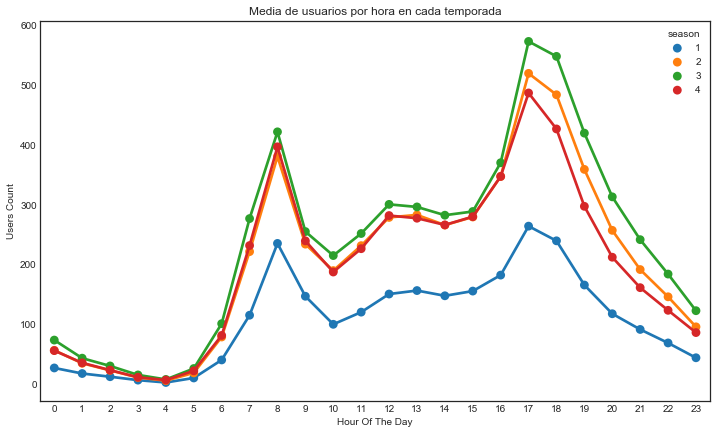

In [13]:
# Media por hora en cada estación del año
hourAggregated = pd.DataFrame(df_bike_hours.groupby(["hr","season"],sort=True)["cnt"].mean()).reset_index()
plt.figure(figsize=(12, 7))
_ = sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["cnt"],hue=hourAggregated["season"], data=hourAggregated,\
                  join=True)
plt.xlabel('Hour Of The Day')
plt.ylabel('Users Count')
plt.title("Media de usuarios por hora en cada temporada")

###### Comentarios
Hemos decidido eliminar del dataset, la primera variable que actúa como índice ya que consideramos que no nos aporta información de valor.

Otro caso de variables relacionadas son las variables "season" y "month". Depende del tipo de análisis que queramos realizar de la información, que podría interesarnos estudiar los datos por estación, lo que nos daría también información por extensión de los meses, o estudiar el uso del servicio mes a mes.

#### 3. Estudia si es necesario normalizar los datos y cómo lo harías. Procede a modificar la base de datos (normalizar) si lo consideras necesario.

Ejemplo de normalización en base a la media de las variables y la desviación que es una de las formas más habituales de normalizar un dataset:
df_normalizado = (df - df.mean()) / df.std() 

###### Comentarios
Consideramos que no es necesario realizar ningún proceso de normalización sobre las variables. Las variables que miden fenómenos ambientales ya vienen normalizadas y tienen una escala similar, con lo que pueden estudiarse en conjunto.

Por otro lado tenemos las variables que hacen el recuento de bicicletas por hora, según sean registradas o no, las cuales también están en la misma escala. 

El resto de variables serían categóricas, guardan la misma escala entre ellas y pueden relacionarse de algún otro modo si fuera necesario.

Así que podemos concliuir que las variables del dataset no parece que necesiten una normalización extra, pero si fuera necesario llevar a cabo un futuro estudio predictivo mediante modelización y se necesitará la normalización de   alguna/s variable/s para que no haya variables que pudieran tomar un peso superior a otras en el modelo, se llevaría a cabo.

#### 4. Detección de valores perdidos (missing values) y descripción de cómo actuarías para solventar el problema.

In [10]:
# Ver si hay datos vacíos o nulos. Para averiguar si en el dataset tenemos valores nulos haremos uso de las funciones
# notnull e innull, que aplicadas sobre el dataframe de la existencia de valores nulos o NAN
# Y podemos ver como todas las variables tienen datos no nulos para cada registro.
df_bike_hours.notnull().all()

dteday        True
season        True
yr            True
mnth          True
hr            True
holiday       True
weekday       True
workingday    True
weathersit    True
temp          True
atemp         True
hum           True
windspeed     True
casual        True
registered    True
cnt           True
dtype: bool

In [11]:
# Otra forma de ver si hay datos vacíos o nulos, debe salir false para saber que no los hay.
df_bike_hours.isnull().any().any()

False

###### Comentarios
La no presencia de Missing Values o NaN, nos hace pensar que tenemos un juego de datos de calidad, es decir en buen estado.

Los valores faltantes o missing pueden tener una influencia significativa en nuestro análisis y futuro modelo predictivo, por lo que siempre es una decisión importante determinar la forma en que los vamos a manejar.

Las alternativas que tenemos para manejarlos son:
1. Dejarlos como están, lo que a la larga nos va a traer bastantes dolores de cabeza ya que en general los algoritmos no los suelen procesar correctamente y provocan errores.
2. Eliminarlos, lo que es una alternativa viable, aunque dependiendo de la cantidad de valores nulos, puede afectar  significativamente el resultado final de nuestro modelo predictivo.
3. Inferir su valor. En este caso, lo que podemos hacer es tratar de inferir el valor faltante y reemplazarlo por el valor inferido. Esta suele ser generalmente la mejor alternativa a seguir.

Nosotros utilizariamos la última alternativa, inferiremos los valores faltantes, usando la media aritmética para los datos cuantitativos, y la moda para los datos categóricos.

Debido a que vamos a utilizar dos métodos distintos para reemplazar a los valores faltantes, dependiendo de si son numéricos o categóricos, el primer paso que debemos realizar es tratar de identificar que columnas de nuestro dataset corresponde a cada tipo de datos. Para realizar esto vamos a utilizar el atributo dtypes del Dataframe de Pandas, como mostramos a continuación:

In [12]:
# Agrupando columnas por tipo de datos
tipos = df_bike_hours.columns.to_series().groupby(df_bike_hours.dtypes).groups

# Lista de columnas categóricas
ctext = tipos[np.dtype('object')]
# Lista de columnas numéricas
columnas = df_bike_hours.columns 
cnum = list(set(columnas) - set(ctext))
# Completando valores faltantes datos cuantitativos
for c in cnum:
    mean = df_bike_hours[c].mean()
    df_bike_hours[c] = df_bike_hours[c].fillna(mean)
# Completando valores faltantes datos categóricos
for c in ctext:
    mode = df_bike_hours[c].mode()[0]
    df_bike_hours[c] = df_bike_hours[c].fillna(mode)

#### 5. Detección de valores extremos (outliers) y descripción de qué harías en cada caso.

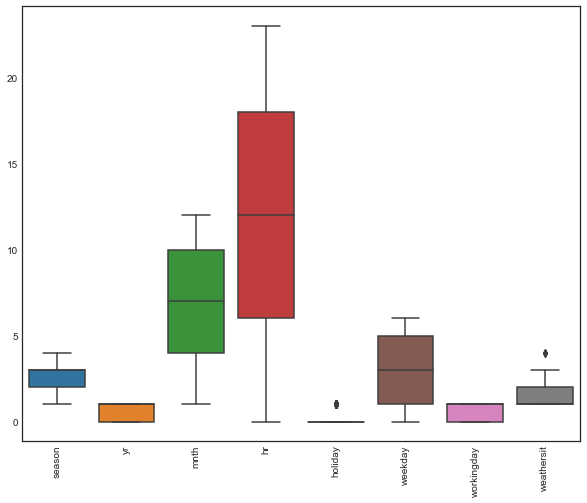

In [13]:
# Para analizar los valores extremos u outliers mostraremos el boxplot de cada variable del dataframe horario. 
# Este es un tipo de gráfica donde puede apreciarse fácilmente la dispersión de los datos o los valores outliers. 
# Dividimos los gráficos boxplots por variables categóricas, cuantitativas y las de recuento.

# boxplots de las variables categóricas
plt.figure(figsize=(10, 8))
sns.set_style("white")
bx_plot = sns.boxplot(data=df_bike_hours.iloc[:,0:-7])
plt.xticks(rotation=90)
plt.show()

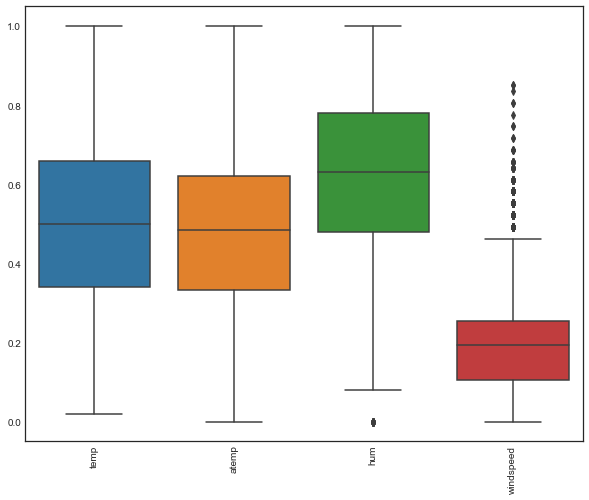

In [14]:
# Boxplots de las variables cuantitativas que miden datos ambientales
plt.figure(figsize=(10, 8))
sns.set_style("white")
bx_plot = sns.boxplot(data=df_bike_hours.iloc[:,9:-3])
plt.xticks(rotation=90)
plt.show()

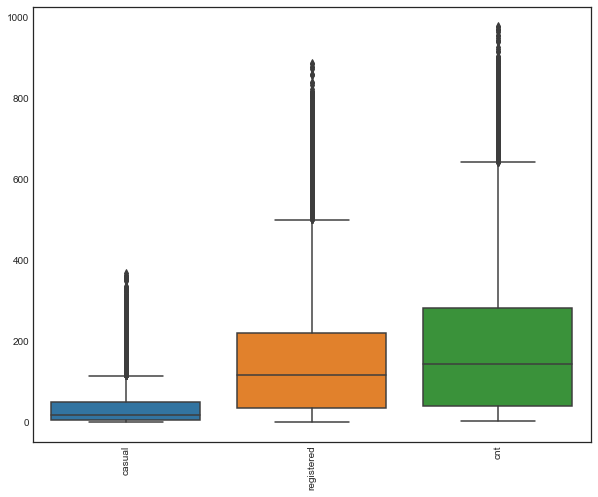

In [15]:
# Boxplots de las variables de recuento
plt.figure(figsize=(10, 8))
sns.set_style("white")
bx_plot = sns.boxplot(data=df_bike_hours.iloc[:,-3:])
plt.xticks(rotation=90)
plt.show()

###### Comentarios
Los valores outliers son datos que están lo suficientemente alejados de la mayoría de valores, de la media y mediana del conjunto, como para ser considerados valores extraños, ya sea porque son muy poco habituales o porque son datos erróneos.

Dependiendo de lo que se esté representando y de lo que se quiera analizar, estos valores deberán o no tenerse en cuenta para el análisis de esos atributos.

In [17]:
# Una forma de eliminar outliers sería eliminar los datos que estuvieran muy alejados
df_WithoutOutliers = df_bike_hours[np.abs(df_bike_hours["cnt"]-df_bike_hours["cnt"].mean()) \
                                   <=(3*df_bike_hours["cnt"].std())]

print("Before outer analysis:{}".format(df_bike_hours.shape))
print("After outer analysis:{}".format(df_WithoutOutliers.shape))

Before outer analysis:(17379, 16)
After outer analysis:(17135, 16)


###### Comentarios sobre los boxplots graficados
Los boxplots son gráficos donde se aprecia fácilmente la distribución de los datos y los outliers.

La caja que representa el boxplot, está delimitada por los percentiles 25 y 75, que dejan al 25% y 75% de los valores por debajo, por tanto, todos los datos que entren en los límites de la caja representarían el 50% de los datos y la línea interior de la caja representa el percentil 50 de la distribución o mediana.

Otra característica del boxplot son los bigotes inferior y superior. Estos bigotes representan la distribución de los datos restantes hasta llegar a los límites del gráfico tanto inferior como superior. Los datos que estén fuera de los límites son los considerados outliers.

En los boxplots de las variables de recuento ("casual", "registered" y "cnt") se aprecia como la mayor parte de valores están en el rango más bajo de cada atributo, y los valores más altos son considerados outliers. De aquí podemos extraer que lo menos habitual son días donde el uso de bicicletas sea muy elevado.

En el caso del boxplot de la variable que mide el viento, "windspeed", tiene muchos valores outliers ya que es poco habitual que haya días con mucho viento.

Los boxplots de las variables de temperatura vuelven a indicarnos su alta correlación, son practicamente iguales, y son muy centrados y con una distribución uniforme, lo que sugiere que lo más habitual a lo largo del año son valores medios de temperatura.

Las variables categóricas arrojan boxplots más singulares debido a la naturaleza de estas variables. Algunas no tiene ni siquiera sentido analizarlas con este tipo de gráficos, por ejemplo la variable "yr" se representa con 0 o 1, según sean del primer año o del segundo. Como son un 50% de valores 0 y otro 50% un 1, el boxplot que sale no tiene ni bigotes.

Por último el boxplot de los días festivos. Esta variable también toma valores 0 o 1, y el boxplot, nos indica que todos los valores 1 son outliers, ya que son muy pocos debido a que la mayoría de días del año son no festivos.

#### 6. Buscar correlaciones entre: las variables predictoras, lo que permitirá ver si hay variables redundantes; y entre variables predictoras y la clase (target).

In [18]:
# Em primer lugar obtenemos la matriz de correlación entre cada par de variables del dataframe horario.
df_bike_hours.corr().round(decimals=3)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000,-0.011,0.830,-0.006,-0.010,-0.002,0.014,-0.015,0.312,0.319,0.151,-0.150,0.120,0.174,0.178
yr,-0.011,1.000,-0.010,-0.004,0.007,-0.004,-0.002,-0.019,0.041,0.039,-0.084,-0.009,0.143,0.254,0.250
mnth,0.830,-0.010,1.000,-0.006,0.018,0.010,-0.003,0.005,0.202,0.208,0.164,-0.135,0.068,0.122,0.121
hr,-0.006,-0.004,-0.006,1.000,0.000,-0.003,0.002,-0.020,0.138,0.134,-0.276,0.137,0.301,0.374,0.394
holiday,-0.010,0.007,0.018,0.000,1.000,-0.102,-0.252,-0.017,-0.027,-0.031,-0.011,0.004,0.032,-0.047,-0.031
weekday,-0.002,-0.004,0.010,-0.003,-0.102,1.000,0.036,0.003,-0.002,-0.009,-0.037,0.012,0.033,0.022,0.027
workingday,0.014,-0.002,-0.003,0.002,-0.252,0.036,1.000,0.045,0.055,0.055,0.016,-0.012,-0.301,0.134,0.030
weathersit,-0.015,-0.019,0.005,-0.020,-0.017,0.003,0.045,1.000,-0.103,-0.106,0.418,0.026,-0.153,-0.121,-0.142
temp,0.312,0.041,0.202,0.138,-0.027,-0.002,0.055,-0.103,1.000,0.988,-0.070,-0.023,0.460,0.335,0.405
atemp,0.319,0.039,0.208,0.134,-0.031,-0.009,0.055,-0.106,0.988,1.000,-0.052,-0.062,0.454,0.333,0.401


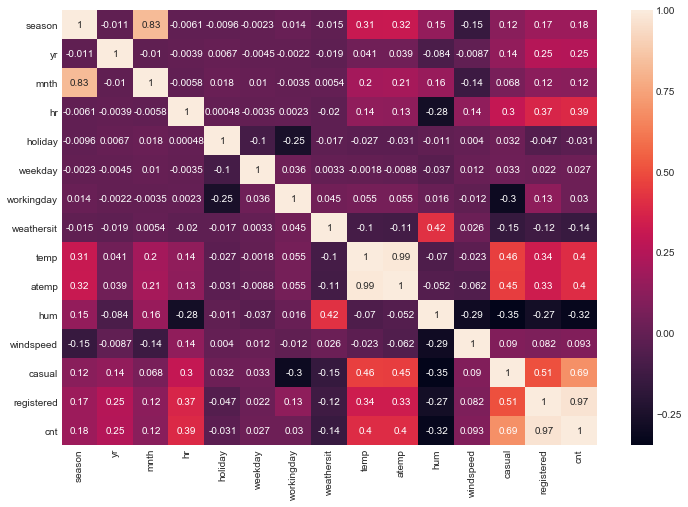

In [19]:
# Pintamos la matriz de correlación con el valor en cada celda y mapa de calor con un gradiente de color en 
# consecuencia
corr = df_bike_hours.corr()
plt.figure(figsize=(12, 8))
_ = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)

###### Comentarios de correlación
El gráfico de correlación representa la matriz de correlación entre cada par de variables del conjunto de datos. Cada cuadrado en el eje "x" y eje "y" representa a una de las variables del conjunto de datos.

La diagonal de la gráfica será la correlación total, valor 1, ya que relaciona a cada variable consigo misma. 

Al lado del gráfico está la leyenda de colores, lo que nos permite según el color de cada cuadrado ver el grado de relación entre cada par de variables.

Dos variables están correlacionadas cuando el valor es cercano a 1 o a -1, correlación positiva o negativa.

Se aprecia alta relación positiva entre las variables "temp" y "atemp", y las variables "registered" y "cnt".

- La variable "temp" indica la temperatura, y "atemp" la sensación de temperatura, y es por esa razón por la cual son muy similares y están correlacionadas.

- Por otro lado, la variable "registered" indica el recuento de bicicletas registradas, y la variable "cnt" el recuento de bicicletas registradas y casuales. Como las casuales suelen ser un número bastante menor que las registradas, al final hay poca diferencia en el recuento total (variable "cnt") y el recuento de registradas.

Por tanto, para el análisis se podría prescindir de una variable de cada uno de estos dos pares de variables altamente correlacionadas, ya que tienen información muy similar.

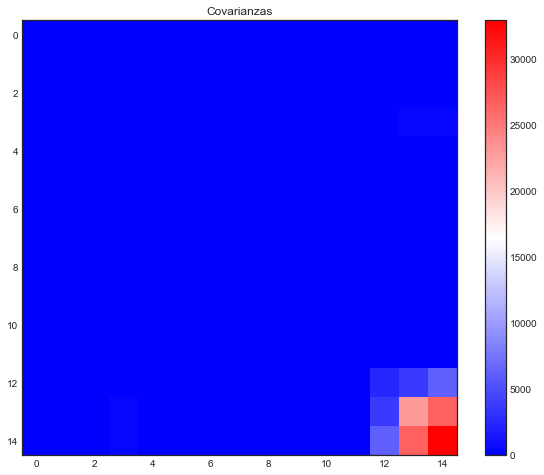

In [21]:
# Mostramos la gráfica de covarianza de los datos. No cogemos la primera variable que es la fecha, ya que daría error.
plt.figure(figsize=(10, 8))
plt.title('Covarianzas')
_ = plt.colorbar(plt.imshow(np.cov(df_bike_hours.iloc[:,1:].T), cmap="bwr"))

In [24]:
# En el gráfico anterior no se aprecia bien la mayoria de valores de covarianza, por tanto normalizamos todo el 
# dataframe para ajustar las variables con la técnica vista anteriormente de media y desviación.
# Para poder normalizar hay que eliminar la variable fecha que ya se dijo que realmente no es necesaria
df_normalizado = (df_bike_hours.iloc[:,1:] - df_bike_hours.iloc[:,1:].mean()) / df_bike_hours.iloc[:,1:].std() 

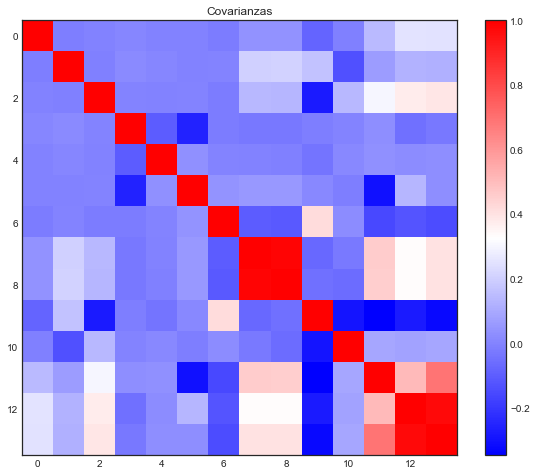

In [25]:
# Mostramos la gráfica de covarianza de los datos:
plt.figure(figsize=(10, 8))
plt.title('Covarianzas')
_ = plt.colorbar(plt.imshow(np.cov(df_normalizado.iloc[:,1:].T), cmap="bwr"))

###### Comentarios sobre covarianzas
El gráfico de covarianzas representa la matriz de covarianza entre cada par de variables del conjunto de datos.
La diagonal de la gráfica representa la varianza de cada propiedad que al normalizar es igual a 1.

La covarianza positiva entre dos variables indica una relación directa, y que cuando una variable crece la otra 
variable también lo hace. Y una covarianza negativa indica una relación inversa, que cuando una variable crece la 
otra variable decrece.

Entonces se puede ver de nuevo como los pares de variables que guardaban mayor relación anteriormente con las 
correlaciones vuelven a hacerlo ahora con las covarianzas.
Estos pares de variables relacionados tienen valor positivo que indica relación directa.

Podemos ver como hay una alta relación positiva entre las variables "temp" y "atemp", y las variables "registered" y "cnt".

###### Scatterplot sobre los datos.

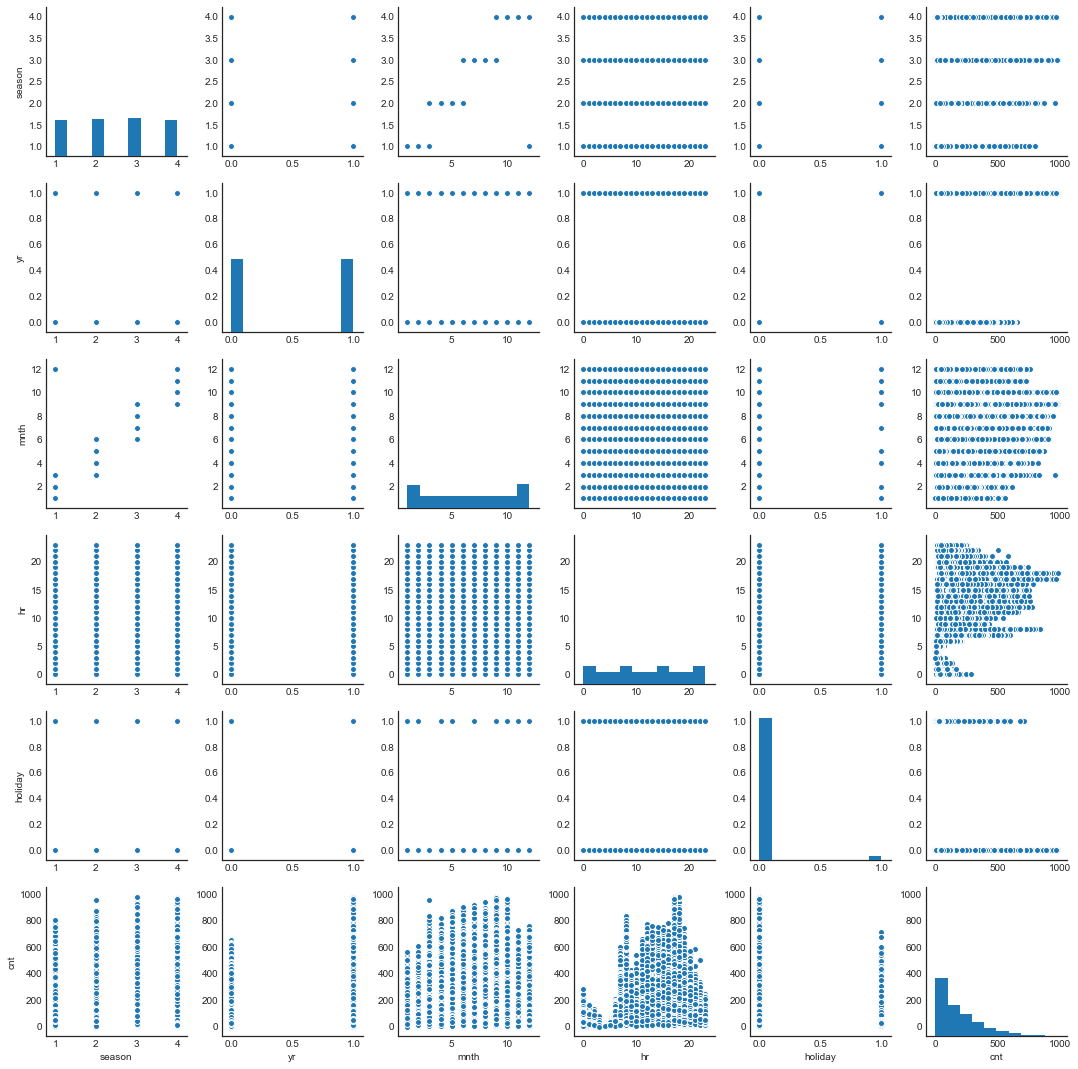

In [26]:
# Seleccionamos la variable target y el resto de variables predictorias, quitando la fecha, para enfrentarlas y ver posibles relaciones
# con matrices de dispersión. La variable target será "cnt", es la variable sobre la cual se quieren hacer 
# las predciones.

vars_bike_hour   = df_bike_hours.columns[1:15]
target_bike_hour = df_bike_hours.columns[-1]

# Se pinta la matriz de dispersión entre las variables del dataframe, en la diagonal los histogramas de cada variable.
pair_plot = sns.pairplot( df_bike_hours[ list(vars_bike_hour[ : 5]) + [target_bike_hour] ] )
plt.show()

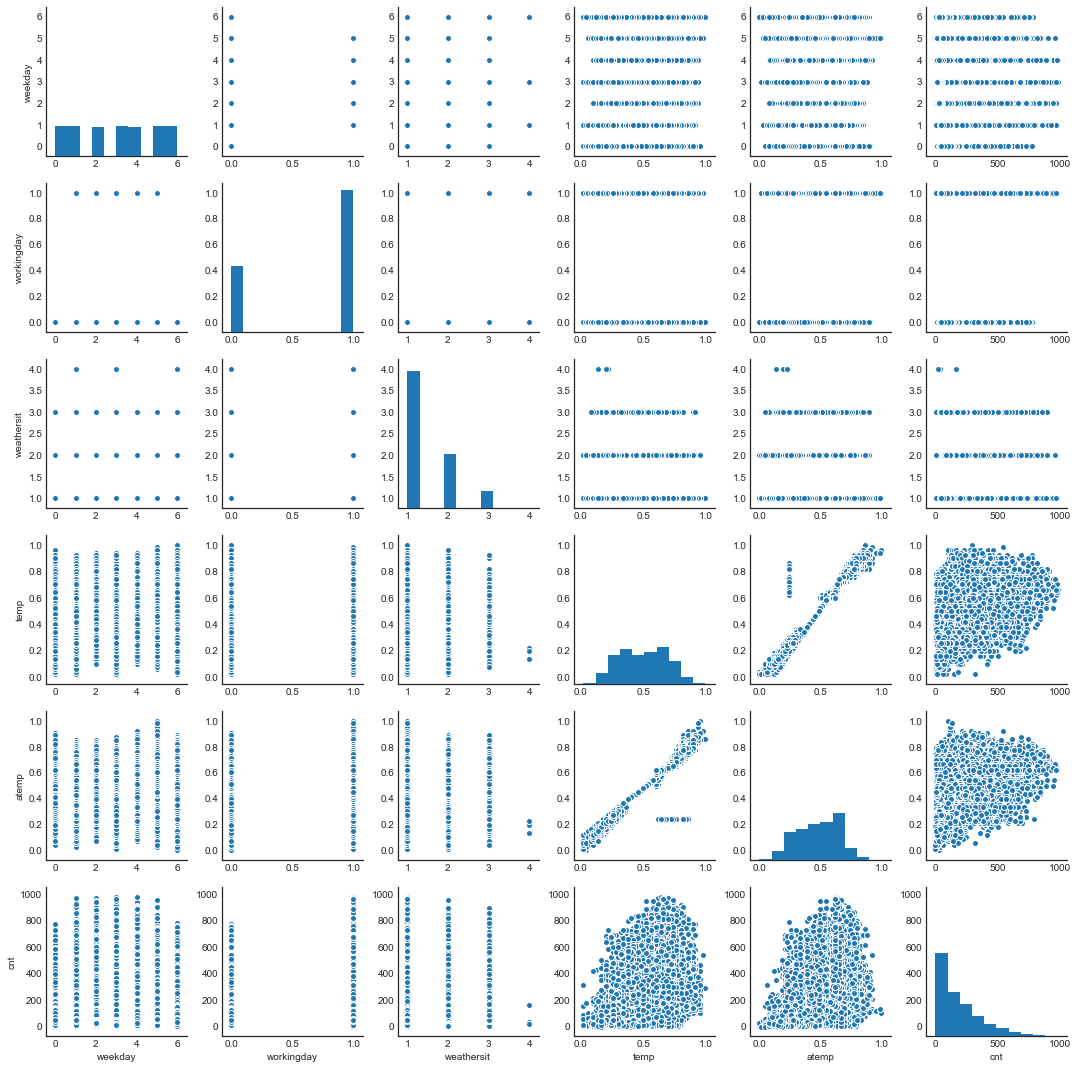

In [27]:
pair_plot = sns.pairplot( df_bike_hours[ list(vars_bike_hour[ 5: 10]) + [target_bike_hour] ] )
plt.show()

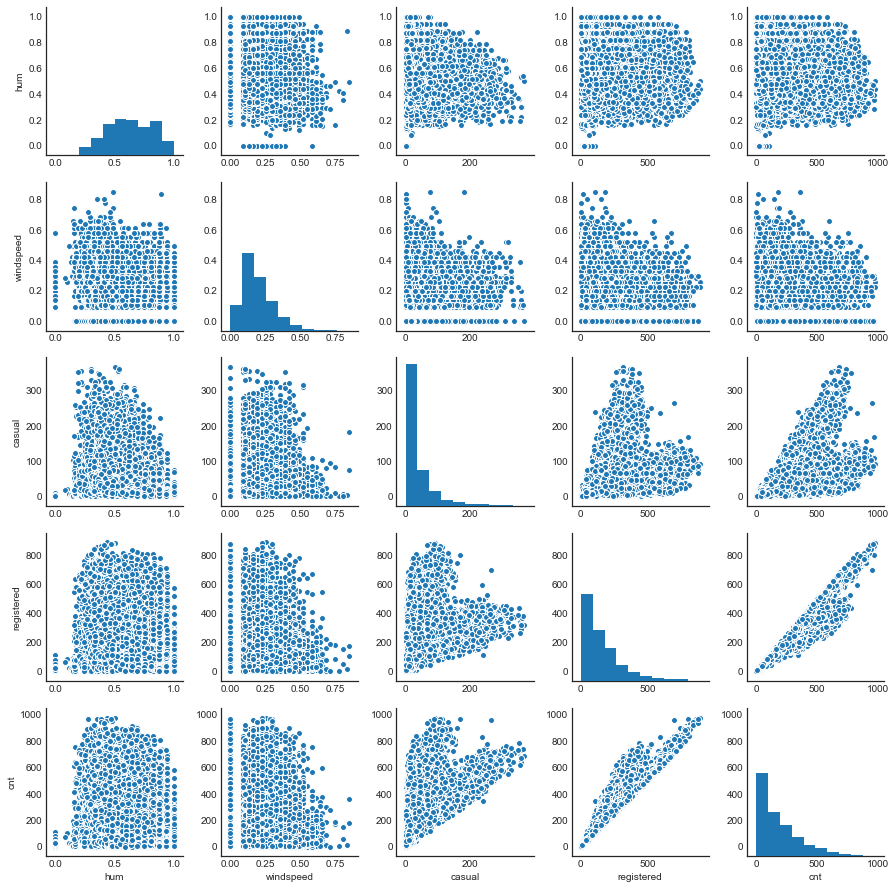

In [28]:
pair_plot = sns.pairplot( df_bike_hours[ list(vars_bike_hour[ 10: 15]) + [target_bike_hour] ] )
plt.show()

###### Comentarios
Con las matrices de dispersión también podemos ver la distribución de los datos y la relación entre cada
par de variables. En la diagonal de la matriz se pueden poner distintos tipos de gráficas, en este caso hemos dibujado los histogramas de cada variable. Los histogramas son más similares para los pares de variables que están correlacionadas como hemos visto anteriormente.

Donde mejor se ve la relación entre variables, es en la parte de la matriz de dispersión que las relaciona, 
donde las variables que tienen alta relación forman prácticamente una recta. Si la recta es creciente significa que 
cuando aumenta el valor de la variable "x", también aumenta el valor de la variable "y". Al contrario si la recta 
es decreciente.

En los diagramas de dispersión vuelve a apreciarse la relación lineal entre los pares de variables que se dijo en secciones precias. Vemos como los datos enfrentados de cada variable acaban formando prácticamente una linea recta.
En las variables "atemp" y "temp" se pueden ver algunos datos que se separan de la gran mayoría, que forma una linea recta, y que posiblemente sean datos que corresponden a días donde hubo una diferencia no habitual entre la sensación de temperatura y la real.

#### 7. Detecta, si hubiera, falsos predictores.

Puede haber variables predictoras que podrían llevar a análisis erróneos, o al menos sesgados, ya sea porque tienen directamente información falsa o porque no tienen en cuenta algún punto.

Pensamos por ejemplo, que estudiar y sacar las conclusiones sólo y exclusivamente a través de la variable "season", la cual indica la temporada del año de cada registro, podría ser un falso predictor, ya que no todos los días de cada estación hace el mismo tiempo, aunque si es más habitual que sigan un mismo patrón, pero podría no tenerse en cuenta los días con condiciones climatológicas distintas.

Por otro lado podríamos crear una nueva variable, en base a las variables de "season" y "weathersit", uniendo así la información de la estación del año y las condiciones climatológicas de cada registro, lo que nos aportaría una información interesante para el resultado del estudio.

#### 8. Estudia si fuera conveniente segmentar alguna de las variables.

Una variable que podriamos segmentar sería la variable target, cnt, para agrupar en rangos el recuento de usos del servicio y estudiar los datos en base a estos rangos que podrían definirse según el estudio de negocio que quiera realizarse para mejorar y aumentar el servicio.

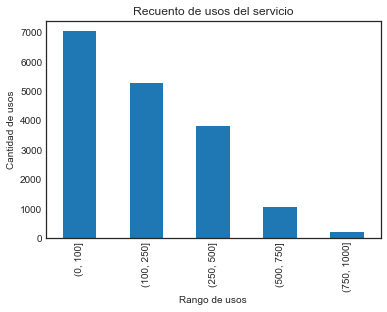

In [29]:
# Creando un segmentos de recuento
cnt_segm = pd.cut(df_bike_hours['cnt'], [0, 100, 250, 500, 750, 1000])
# Creando el grafico de barras desde pandas
plot = pd.value_counts(cnt_segm).plot(kind='bar', title='Recuento de usos del servicio')
plot.set_ylabel('Cantidad de usos')
plot.set_xlabel('Rango de usos')
plt.show()

In [30]:
# Agrupación por segmento segun recuento de usos.
pd.value_counts(cnt_segm)

(0, 100]       7035
(100, 250]     5272
(250, 500]     3793
(500, 750]     1069
(750, 1000]     210
Name: cnt, dtype: int64

#### 9. Estudia si fuera conveniente crear nuevas variables sintéticas basada en las variables originales.

Como comentamos en el apartado de los falsos predictores, una opción de una nueva variable a utilizar para analizar los datos, sería unir los datos de las variables "season" y "weathersit", para así de esta forma poder estudiar los datos por grupos de estación-condicion_climatológica, y ser capaces de ver si los días con buenas o malas condiciones se comportan igual en diferentes estaciones del año.

Otra variable que vemos que podría ser necesaria, es la variable día. Imagininemos que queremos hacer un estudio a nivel de día del funcionamiento del servicio de rentíng en los meses de agosto de ambos años, para saber su comportamiento en este periodo vacacional concreto. Para poder hacer esto simplemente tenemos que extraer el día de la fecha, para así poder usarlo en estudios posteriores o por ejemplo ver si hay alguna relación entre los últimos días del mes en los cuales la gente cobra, y el uso del servicio, pues al tener más dinero pueden ser propensos a usar otros medios de locomoción más caros.

In [40]:
def f(row):
    if row["season"] == 1:
        return row["weathersit"]
    elif row["season"] == 2:
        if row["weathersit"] == 1: return 5
        if row["weathersit"] == 2: return 6
        if row["weathersit"] == 3: return 7
        if row["weathersit"] == 4: return 8
    elif row["season"] == 3:
        if row["weathersit"] == 1: return 9
        if row["weathersit"] == 2: return 10
        if row["weathersit"] == 3: return 11
        if row["weathersit"] == 4: return 12    
    elif row["season"] == 4:
        if row["weathersit"] == 1: return 13
        if row["weathersit"] == 2: return 14
        if row["weathersit"] == 3: return 15
        if row["weathersit"] == 4: return 16
    print(row)
    print

df_bike_hours['season_weather'] = df_bike_hours.apply(f, axis=1)
df_bike_hours.dteday = pd.to_datetime(df_bike_hours.dteday)
df_bike_hours['day'] = df_bike_hours.dteday.dt.day
df_bike_hours.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_weather,day
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1,1
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1,1
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1,1
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1,1
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1,1
5,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,2,1
6,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,1,1
7,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1,1
8,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1,1
9,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,1,1


###### Conclusión final
Terminar eliminando las variables que puedan quedar y hayamos visto que queremos quitar porque no nos aportan valor al
análisis que queremos realizar. Y después exportar el dataframe resultante a un fichero que sería el de partida para el posterior análisis predictivo.

Eliminamos la variable "dtday", pues tenemos esa misma información en las variables "yr", "mnth" y "day" y de esta forma tenemos más granuralidad pudiendo hacer análisis más profundos. La variable "atemp" por tener una fuerte correlación con "temp" y "registered" por su alta correlación con "cnt".

In [41]:
df_bike_final = df_bike_hours.drop(labels=["dteday", "atemp", "registered"], axis=1)
df_bike_final.to_csv('df_bike_final.csv')

In [42]:
# Vistazo al dataset resultante
df_bike_final.head(10)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt,season_weather,day
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,3,16,1,1
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,8,40,1,1
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,5,32,1,1
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,3,13,1,1
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,0,1,1,1
5,1,0,1,5,0,6,0,2,0.24,0.75,0.0896,0,1,2,1
6,1,0,1,6,0,6,0,1,0.22,0.80,0.0000,2,2,1,1
7,1,0,1,7,0,6,0,1,0.20,0.86,0.0000,1,3,1,1
8,1,0,1,8,0,6,0,1,0.24,0.75,0.0000,1,8,1,1
9,1,0,1,9,0,6,0,1,0.32,0.76,0.0000,8,14,1,1
